## Testeo de la librería pandasAI


En este documento voy a probar como funciona la librería aislando en un venv de pyenv en la versión 3.10.0 instalando todas las dependencias y extras de la librería PandasAI

In [2]:
from pandasai import SmartDataframe
from pandasai import SmartDatalake

Tenemos que importar la clave en el fichero para que este  la pueda leer.

In [3]:
import pandas as pd
import numpy as np
import os
from dotenv import dotenv_values
keys = dotenv_values("../.env-token")
os.environ["PANDASAI_API_KEY"] = keys["PANDASAI_API_KEY"]


### Carga de dataset y pruebas

En este primer apartado vamos a caargar un dataset de detección de esclerosis multiple y ver hasta donde podemos llegar únicamente haciendo preguntas

In [4]:
fichero = pd.read_csv('Data/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

Creamos la instancia del SmartDataFrame ya que únicamente tenemos un dataset

'/Users/alejandro/Documents/Repositorios/alejandromadrid/PythonProjects/PandasAI-Testing/exports/charts/temp_chart.png'

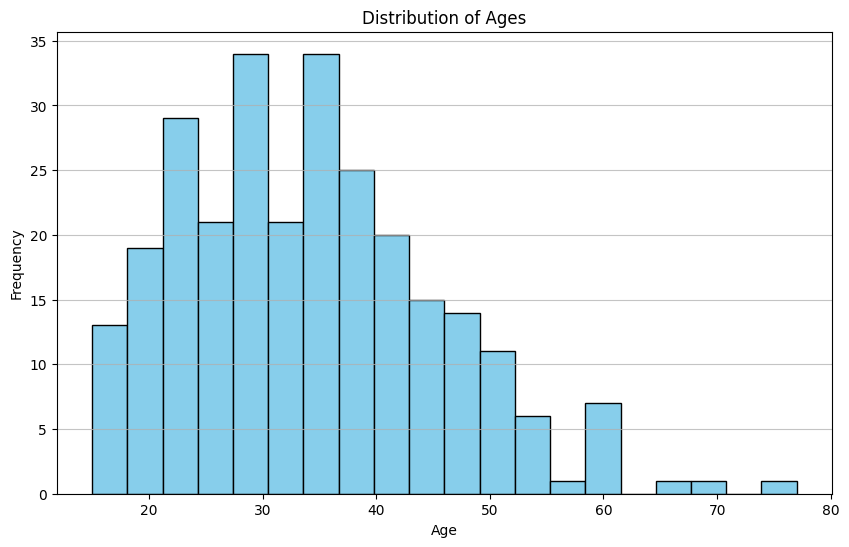

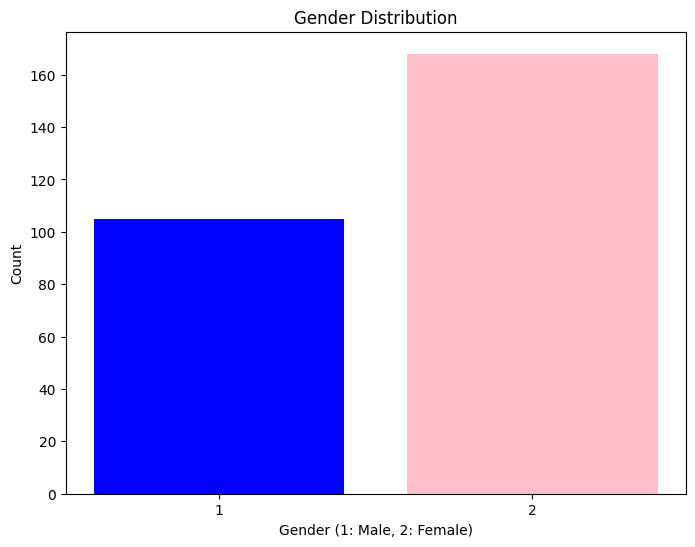

In [14]:
smartdataframe = SmartDataframe(fichero, name="Multiple Sclerosis Dataset", description="An isolated multiple sclerosis dataset with information about the multiple sclerosis disease")
smartdataframe.chat("Make some graphs from the dataset to see what's in the dataset")

Como podemos ver ha dibujado gráficas para todas las primeras columnas del dataset, ahora vamos a preguntarle que nos de una opinión sobre como tratar con el dataset.

In [15]:
smartdataframe.chat("Can you make the scheme of how to process the data to make a predictor ? ")

'The accuracy of the Random Forest classifier is: 1.0'

Aquí ha hecho por si mismo un Random Forest con una accuracy perfecta pero no nos ha dado el código, vamos a sacar el código usando el método 'last_code_executed' que nos devuelve el último código que pandasai ejecuta en su LLM

In [44]:
print(smartdataframe.last_code_executed)

df = dfs[0]
df.dropna(inplace=True)
X = df.drop(columns=['group'])
y = df['group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
result = {'type': 'string', 'value': f'The accuracy of the Random Forest classifier is: {accuracy}'}


Como podemos observar viendo nuestos imports y las funciones usadas, el propio PandasAI gestiona sus librerías y ejecuta las funciones que usa así como la ejecución del código que genera para devolver en este caso la accuracy.

Para poder ejecutar este codigo por nuestra cuenta podemos hacer un copia y pega en una celda o con la librería **IPython** podemos crear una instancia celda y ejecutar código en formato texto

### Conectores

Lo siguiente que vamos a probar son los conectores, probadndo con una base local que tendremos en este mismo directorio y conectándonos a alguna BD online para obtener información y que nos plotee y muestre información relevante.

#### Conector a BD local

Como BD local me he descargado el dataset de kaggle en formato sqlite <a href="https://www.kaggle.com/datasets/kaggle/sf-salaries">SF Salaries by Kaggle</a>.

Para poder conectarnos a la base de datos, PandasAI ha diseñado sus **conectores** que nos permiten crear instancias tipo **cursor** de python para que se realizen consultas.

In [3]:
from pandasai.connectors import SqliteConnector

Para Sqlite no necesitamos definir nada ya que esta se gestiona con un formato reducido en el que no necesitamos usar puertos, usernames, passwords o hosts, si fuera así tendríamos que definir una configuración más o menos así para MySQL:


    "host": "localhost",
    "port": 3306,
    "database": "mydb",
    "username": "root",
    "password": "root",
    "table": "loans",
    "where": [
        # this is optional and filters the data to
        # reduce the size of the dataframe
        ["loan_status", "=", "PAIDOFF"],
    ]

Este ejemplo es para una consulta de prestamos pagados por lo que tendríamos que definir el **where** si queremos que se reduzca el tamaño de prompt lo que, si estamos usando un LLE de pago como OpenAI nos repercutirá de buena manera en el coste por token.


In [4]:
connector = SqliteConnector(
    config={
     "database":    "Data/db.sqlite",
     "table":       "Salaries",
     "low_memory":  "False"
    }
)
smartdataframe = SmartDataframe(connector)
smartdataframe.chat("How are pay, overtime and benefits allocated between different groups?")

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_38532\1617844610.py:9: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  smartdataframe.chat("How are pay, overtime and benefits allocated between different groups?")
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_38532\1617844610.py:9: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  smartdataframe.chat("How are pay, overtime and benefits allocated between different groups?")
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_38532\1617844610.py:9: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  smartdataframe.chat("How are pay, overtime and benefits allocated between different groups?")
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_38532\1617844610.py:9: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory

""
JobTitle
ACCOUNT CLERK
ACCOUNTANT
ACCOUNTANT INTERN
"ACPO,JuvP, Juv Prob (SFERS)"
ACUPUNCTURIST
...
X-RAY LABORATORY AIDE
X-Ray Laboratory Aide
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS"


In [6]:
smartdataframe.chat("How have salaries changed over time between differrent groups of people?")

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_36280\633419342.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  smartdataframe.chat("How have salaries changed over time between differrent groups of people?")
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_36280\633419342.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  smartdataframe.chat("How have salaries changed over time between differrent groups of people?")
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_36280\633419342.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  smartdataframe.chat("How have salaries changed over time between differrent groups of people?")
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_36280\633419342.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memo

,JobTitle,Year,BasePay,OvertimePay,OtherPay,Benefits
0,ACCOUNT CLERK,2011,43300.806506,373.200843,361.656988,NaN
1,ACCOUNTANT,2011,46643.172000,0.000000,786.096000,NaN
2,ACCOUNTANT INTERN,2011,28732.663958,24.430625,274.648333,NaN
3,"ACPO,JuvP, Juv Prob (SFERS)",2014,62290.780000,0.000000,0.000000,17975.590
4,ACUPUNCTURIST,2011,66374.400000,0.000000,1220.000000,NaN
...,...,...,...,...,...,...
4132,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",2011,52609.910000,0.000000,1022.960000,NaN
4133,Youth Comm Advisor,2012,57544.730000,0.000000,0.000000,28229.660
4134,Youth Comm Advisor,2013,33174.840000,0.000000,2648.455000,15521.015
4135,Youth Comm Advisor,2014,32417.420000,0.000000,4048.490000,15545.280


: 

Este error ocurre a veces cuando hacemos llamadas a bd locales desde pandasai

Esto lo he ejecutado para poder saber el número de tablas que tenemos en nuestra base de datos, recomiendo su uso si estás tratando con una BD de sqlite ajena

In [21]:
import sqlite3
conn = sqlite3.connect("db.sqlite")
cursor = conn.cursor()
cursor.execute('''
               SELECT name from sqlite_master WHERE type='table';
               ''')
tablas= cursor.fetchall()
print("Tablas de la base de datos:")
[print(tabla[0]) for tabla in tablas]
conn.close()

Tablas de la base de datos:
Salaries


#### Conector a BD online 

Para esta ejecución requerimos del paquete adicional *yfinance*, *pyarrow* y *fastparquet*

In [7]:
from pandasai.connectors.yahoo_finance import YahooFinanceConnector

yahooConnector = YahooFinanceConnector("MSFT") # MSFT --> Abreviación para Microsoft

smartdataframe = SmartDataframe(yahooConnector)
smartdataframe.chat("what is the closing price for yesterday?")

416.07000732421875

In [8]:
print(smartdataframe.last_code_executed)

df = dfs[0]
closing_price_yesterday = df['Close'].iloc[-2]
result = {'type': 'number', 'value': closing_price_yesterday}


No es que sea un código muy explicable ya que el propio pandasai se ha gestionado su propio dataset con los precios de venta de ayer, ha sacado los valores numéricos, ordenarlos al revés y sacarlo por pantalla. Pero funciona

### LLE

PandasAI tiene puede trabajar con muchos LLM, entre ellos encontramos:
- **BambooLLM**: Es el LLM propio de pandasAI, diseñado para el análisis de datos. Actualmenta está en una beta cerrada pero logeando en su página te la conceden.
- **OPENAI** : Soporta todos los modelos de openai usando nuestra clave de api de openai.
- **Google PaLM**
- **Azure OpenAI**
- **HugginhFace**: Para la generación de texto

Para definir estas tenemos que ejecutar:

In [ ]:
# Para BambooLLM
from pandasai import SmartDataframe
from pandasai.llm import BambooLLM
# Creamos la instancia LLM
llm = BambooLLM(api_key="Aquí ponemos nuestra clave API") # Este modelo no es necesario de definir si estamos trabajando sin definir nada --> LLM default
# Si tenemos la clave ya importada o como variable de entorno de nuestro sistema basta con dejar el constructor vacío
llm = BambooLLM()
# Pasamos a la pregunta la configuración
df = SmartDataframe("dataset a trabajar", config={"llm": llm})

In [ ]:
# Para OpenAI
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
#
llm = OpenAI(api_token="Aquí ponemos nuestra clave")
# Lo mismo que antes
llm = OpenAI()
#
df = SmartDataFrame("dataset a trabajar", config={"llm": llm})

Además, PandasAI tiene integrada la opción de contar los tokens y saber cuando nos ha costado una consulta usando sus callbacks.

Voy a copiar el código de la página de ejemplo para no tener que realizar una consulta innecesaria ahora y gastar saldo.

In [ ]:
"""Example of using PandasAI with a pandas dataframe"""

from pandasai import SmartDataframe
from pandasai.llm import OpenAI
from pandasai.helpers.openai_info import get_openai_callback
import pandas as pd

llm = OpenAI()

# conversational=False is supposed to display lower usage and cost
df = SmartDataframe("data.csv", config={"llm": llm, "conversational": False})

with get_openai_callback() as cb:
    response = df.chat("Calculate the sum of the gdp of north american countries")

    print(response)
    print(cb)
#  The sum of the GDP of North American countries is 19,294,482,071,552.
#  Tokens Used: 375
#	Prompt Tokens: 210
#	Completion Tokens: 165
# Total Cost (USD): $ 0.000750


Como podemos ver, la salida produce varias cosas:
- La respuesta a la pregunta planteada
- Número de tokens usados para la salida
- Número de tokens usados en el prompt
- Tokens rellenados para obtener la salida
- Coste total de la consulta al LLM --> se pone en dolares ya que es la unidad que ellos manejan

### Agent

El agent es un método que engloba los dos métodos principales de PandasAI, **SmartDataFrame** que nos permite usar un dataset, conector ... y **SmartDataLake** que es lo mismo que el anterior pero nos permite usar más de uno, permitiéndonos hacer consultas sobre datasets entrelazados y varias tablas.

Agent engloba todo esto y a la hora de inicializarlo solo lo creamos como si fuera un Frame o Lake, 
- Para 1 dataset    -->     Agent(dataset, config)
- Para >1 dataset   -->     Agent([dataset1, dataset2], config)

Además, este método nos permite entrenar al modelo para que aprenda a responder como nosortos queremos, para ello antes de hacer la pregunta tenemos que entrenar al agente

In [9]:
from pandasai import Agent

# Voy a usar el dataset que teníamos antes para realizar una consulta básica y luego aplicaré el entrenamiento

agent = Agent("conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")

agent.chat("What's the number of cases for the disease? ")

273

In [11]:
# Ahora vamos a entrenar al agente con una mentira y repetir la pregunta 

agent.train(docs="The disease only appears in men, sex labeled with 1")

agent.chat("What's the number of cases for the disease? ")

105

También somos capaces de entrenar al Agente usando "Q/A Training" por medio de una pregunta y el código que queremos que nos muestre, lo definiríamos como:

In [ ]:
from pandasai import Agent

agent = Agent("data.csv")

# Train the model
query = "What is the total sales for the current fiscal year?"
response = """
import pandas as pd

df = dfs[0]

# Calculate the total sales for the current fiscal year
total_sales = df[df['date'] >= pd.to_datetime('today').replace(month=4, day=1)]['sales'].sum()
result = { "type": "number", "value": total_sales }
"""
agent.train(queries=[query], codes=[response])

response = agent.chat("What is the total sales for the last fiscal year?")
print(response)
# The model will use the information provided in the training to generate a response


### Características extra

Como características extra, tenemos varias formas de controlar la generación de texto: 
- **Determinismo**: El determinismo en el contexto de LLM se refiere a la reproducibilidad para el mismo input.
- **Temperatura** : La temperatura es un marametro del LLE que se encarga de la aleatoriedad del output. Dejando una aleatoriedad en 0 (temperature=0) deja al modelo escoger la siguiente palabra con la máxima puntuación paso a paso. 

Esto es todo lo básico de PandasAI para poder trabajar y realizar pruebas, todo lo que queda es jugar con datasets.

Toda la información se puede encontrar en su <a href="https://docs.pandas-ai.com/intro">página de documentación</a>